**Importing required libraries.**

In [ ]:
#importing all essential libraries

import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize



In [ ]:
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict


In [ ]:
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(500)
data_news = pd.read_csv('bbc-text.csv',delimiter=',',encoding='latin-1')
data_news.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [3]:
data_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
category    2225 non-null object
text        2225 non-null object
dtypes: object(2)
memory usage: 34.8+ KB


Text(0.5, 1.0, 'CountPlot')

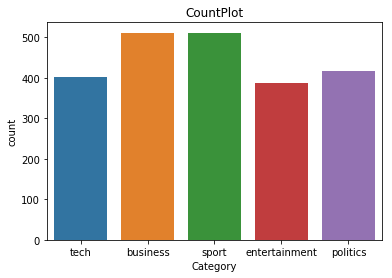

In [4]:
sns.countplot(data_news.category)
plt.xlabel('Category')
plt.title('CountPlot')

## Data Preprocessing

In [ ]:
# 1. Removing Blank Spaces
data_news['text'].dropna(inplace=True)
# 2. Changing all text to lowercase
data_news['text_original'] = data_news['text']
data_news['text'] = [entry.lower() for entry in data_news['text']]
# 3. Tokenization-In this each entry in the data will be broken into set of words
data_news['text']= [word_tokenize(entry) for entry in data_news['text']]

# 4. Remove Stop words, Non-Numeric and perfoming Word Stemming/Lemmenting.

# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. By default it is set to Noun
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

data_news.head()

In [6]:
for index,entry in enumerate(data_news['text']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    data_news.loc[index,'text_final'] = str(Final_words)

In [ ]:
data_news.drop(['text'], axis=1)
output_path = 'preprocessed_data.csv'
Corpus.to_csv(output_path, index=False)

In [8]:

#Splitting the data into train and test datasets
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(data_news['text_final'],Corpus['category'],test_size=0.3)

In [9]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [10]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(Corpus['text_final'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

print(Tfidf_vect.vocabulary_)

{'tv': 4648, 'future': 1835, 'hand': 1996, 'viewer': 4790, 'home': 2095, 'theatre': 4487, 'system': 4407, 'plasma': 3322, 'digital': 1238, 'video': 4786, 'recorder': 3631, 'move': 2907, 'living': 2608, 'room': 3830, 'way': 4859, 'people': 3249, 'watch': 4855, 'different': 1234, 'five': 1724, 'year': 4979, 'time': 4526, 'accord': 31, 'expert': 1581, 'panel': 3187, 'gather': 1861, 'annual': 200, 'consumer': 954, 'electronics': 1427, 'show': 4048, 'la': 2485, 'discuss': 1266, 'new': 2992, 'technology': 4445, 'impact': 2181, 'one': 3090, 'favourite': 1652, 'lead': 2524, 'trend': 4607, 'programme': 3476, 'content': 961, 'deliver': 1165, 'via': 4778, 'network': 2987, 'cable': 622, 'satellite': 3898, 'telecom': 4450, 'company': 869, 'broadband': 571, 'service': 3993, 'provider': 3514, 'front': 1814, 'portable': 3366, 'device': 1225, 'ce': 694, 'personal': 3269, 'pvr': 3539, 'box': 532, 'like': 2588, 'tivo': 4532, 'uk': 4662, 'allow': 139, 'record': 3630, 'store': 4272, 'play': 3325, 'pause': 

In [11]:
print(Train_X_Tfidf)


  (0, 4979)	0.06931933035044019
  (0, 4960)	0.037914104389267775
  (0, 4753)	0.08383961772275399
  (0, 4702)	0.09593679898778092
  (0, 4635)	0.0786631968812092
  (0, 4597)	0.09593679898778092
  (0, 4526)	0.0877035181651098
  (0, 4366)	0.11500145284106822
  (0, 4318)	0.12255568186878617
  (0, 4196)	0.13139590081218508
  (0, 4014)	0.13789878072463674
  (0, 3993)	0.12753866989965373
  (0, 3971)	0.22101358196938484
  (0, 3908)	0.07695798567012196
  (0, 3746)	0.09199233469166736
  (0, 3727)	0.0786631968812092
  (0, 3560)	0.0880857356149831
  (0, 3474)	0.12513933180815848
  (0, 3473)	0.1418722481881557
  (0, 3472)	0.08937826734122511
  (0, 3458)	0.06530254087879524
  (0, 3358)	0.0880857356149831
  (0, 3284)	0.11225139452624366
  (0, 2995)	0.06364610304861103
  (0, 2988)	0.07474538115179438
  :	:
  (1556, 564)	0.02232054838182654
  (1556, 471)	0.03209695144949085
  (1556, 420)	0.04038342338262111
  (1556, 419)	0.03843834665272805
  (1556, 405)	0.019618697998008465
  (1556, 394)	0.018530840158

In [16]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

SVM Accuracy Score ->  98.35329341317365


In [17]:
print(classification_report(Test_Y,predictions_SVM))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       161
           1       0.98      1.00      0.99       120
           2       0.98      0.98      0.98       125
           3       0.99      0.99      0.99       136
           4       0.99      0.99      0.99       126

    accuracy                           0.98       668
   macro avg       0.98      0.98      0.98       668
weighted avg       0.98      0.98      0.98       668

